### Primeiro, importamos as bibliotecas

In [29]:
import numpy as np

from matplotlib.colors import ListedColormap

In [30]:
#Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Definimos a classe do Perceptron para modularizar o código
O modelo classifica como um os valores maiores ou iguais à 0 e como zero os valores menores que 0


In [31]:
class Perceptron:
    #Alpha:  Taxa de aprendizagem
    #Ephocs: Número de iterações(épocas)
    def __init__(self, alpha, ephocs):
        self.alpha = alpha
        self.ephocs = ephocs

    #Método para treinar a classe
    #X: Conjunto de dados
    #y: Rótulosdo dataset
    def fit(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        self.e = []

        for _ in range(self.ephocs):
            error = 0
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                error += int(update != 0.0)
            self.e.append(error)

    #Método que calcula o prouto entre os pesos e os inputs
    #Retorna 1 caso o valor seja >= 0 e 0 caso contrário
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    #Método que retorna o produto escalar entre o vetor de entradas(xi) e o velor de pesos somado com o bias
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

### Carregamos a base de dados

In [32]:
x_train = np.load('db0/X_train.npy'); y_train = np.load('db0/y_train.npy')
x_test = np.load('db0/X_test.npy'); y_test = np.load('db0/y_test.npy')

### Criamos o objeto para treino e em seguida plotamos o resultado

In [33]:
#Estanciando a classe do Perceptron e executando o treinamento
perceptron = Perceptron(0.1, 5000)
perceptron.fit(np.abs(x_train),np.abs(y_train)) #Utilizando o valor absoluto

In [34]:
#Função para calcular e plotar o resultado
def result(X, y, classifier, step=0.02):

    marker  = ('s','x','o','^','v')
    color = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(color[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() -1 ,X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1 ,X[:,1].max()+1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha = 0.2, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1], c=cmap(idx), marker=marker[idx], label = cl)

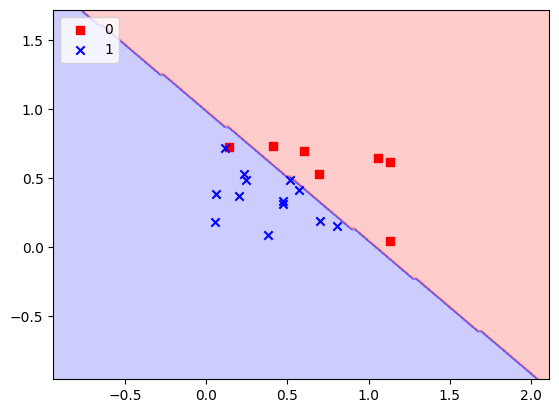

In [35]:
#Plot do resultado
result(np.abs(x_test), np.abs(y_test), perceptron) #Utilizando o valor absoluto
plt.legend(loc='upper left')
plt.show()

O modelo que foi proposto não consegue separar os dados pois sua distribuição não é linearmente separável